In [1]:
import mlgrad.pca as pca
import mlgrad.inventory as inventory
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# def dist2(S, X, c):
#     return np.array([((S @ x) @ x) for x in (X-c)])

In [3]:
X, Y = load_iris(return_X_y=True)

In [4]:
c, As, Ls = pca.find_loc_and_pc(X, 2)

In [5]:
print(Ls)
print(As)

[4.200 0.241]
[[ 0.361 -0.085  0.857  0.358]
 [ 0.657  0.730 -0.173 -0.076]]


In [6]:
U = pca.transform(X, c, As)

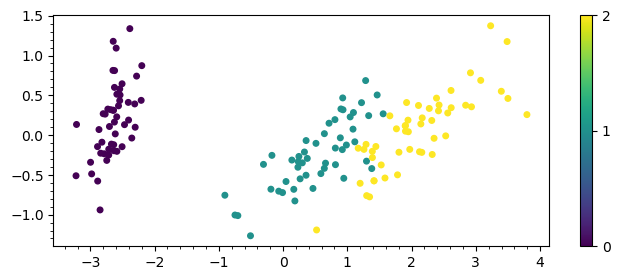

In [7]:
plt.figure(figsize=(8, 3))
cs = plt.scatter(U[:,0], U[:,1], c=Y, s=16)
plt.colorbar(cs, ticks=[0,1,2])
plt.minorticks_on()
plt.show()

In [8]:
U0 = U[Y==0]
U1 = U[Y==1]
U2 = U[Y==2]

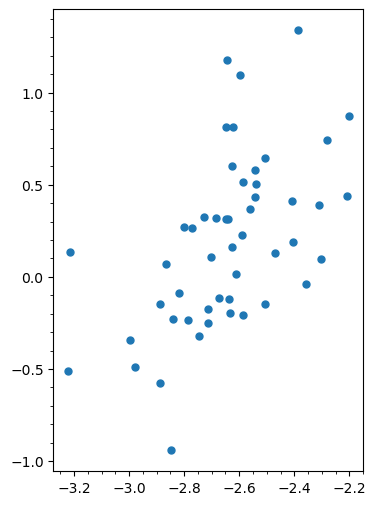

In [9]:
plt.figure(figsize=(4, 6))
plt.scatter(U0[:,0], U0[:,1], s=25, label="0")
plt.minorticks_on()
plt.show()

In [10]:
c0 = pca.location(U0)
C0 = pca.scatter_matrix(U0-c0)
S0 = np.linalg.inv(C0)
print(c0)
# print(C0)
print(S0)

[-2.642  0.191]
[[29.496 -7.593]
 [-7.593  6.642]]


In [11]:
def eval_dd(S, c, xr, yr):
    xx, yy = np.meshgrid(xr, yr)
    xy = np.c_[xx.ravel(), yy.ravel()]
    dd = inventory.mahalanobis_distance(S, xy, c)
    dd = np.sqrt(dd.reshape(xx.shape))
    return xx, yy, dd

xb = inventory.array_bounds(U0[:,0])
yb = inventory.array_bounds(U0[:,1])
xrange = np.linspace(xb[0], xb[1], 101)
yrange = np.linspace(yb[0], yb[1], 101)
xx, yy, dd = eval_dd(S0, c0, xrange, yrange)

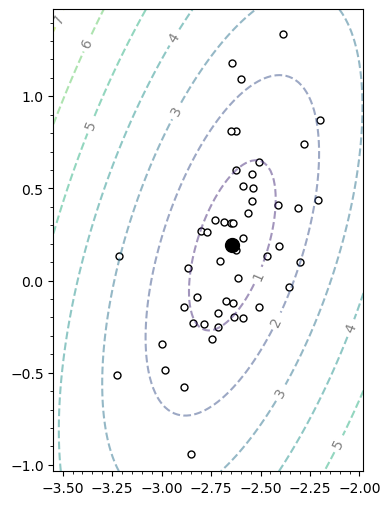

In [12]:
plt.figure(figsize=(4, 6))
plt.scatter(U0[:,0], U0[:,1], s=25, c='w', edgecolors='k', label="0")
plt.scatter([c0[0]], [c0[1]], s=100, c='k')
cc = plt.contour(xx, yy, dd, alpha=0.5, linestyles='--')
plt.clabel(cc, colors='k', fontsize=10)
plt.minorticks_on()
plt.show()

[[ 44.217 -10.516]
 [-10.516   6.354]]


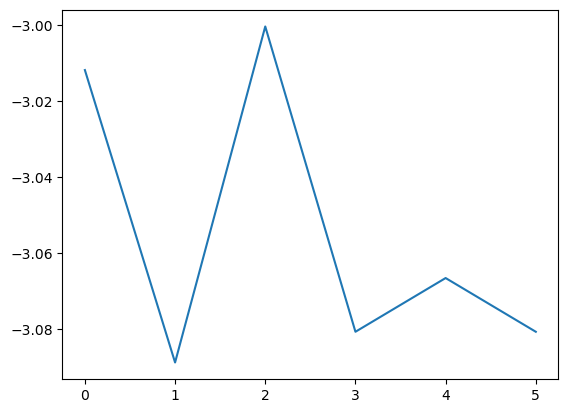

In [13]:
from mlgrad.af import averaging_function
import mlgrad.funcs as funcs

wma = averaging_function("WM", funcs.SoftAbs_Sqrt(0.001), kwds={"alpha":0.94})
# wma = averaging_function("WMZ", kwds={"alpha":3.5})
qvals = []
cc, SS = pca.robust_location_scatter(U0, wma, qvals=qvals)
print(SS)
plt.plot(qvals)
plt.show()

In [14]:
xx, yy, dd1 = eval_dd(SS, cc, xrange, yrange)

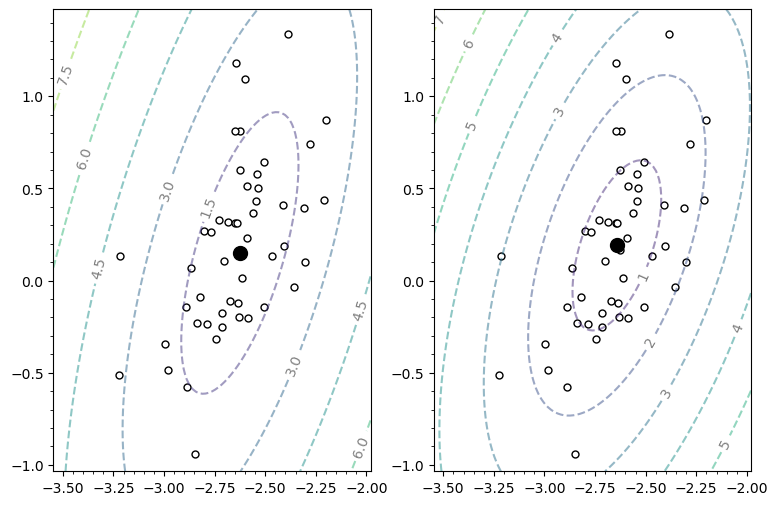

In [15]:
plt.figure(figsize=(9, 6))
plt.subplot(1,2,1)
plt.scatter(U0[:,0], U0[:,1], s=25, c='w', edgecolors='k', label="0")
plt.scatter([cc[0]], [cc[1]], s=100, c='k')
cs1 = plt.contour(xx, yy, dd1, alpha=0.5, linestyles='--')
plt.clabel(cs1, colors='k', fontsize=10)
plt.minorticks_on()
plt.subplot(1,2,2)
plt.scatter(U0[:,0], U0[:,1], s=25, c='w', edgecolors='k', label="0")
plt.scatter([c0[0]], [c0[1]], s=100, c='k')
cs = plt.contour(xx, yy, dd, alpha=0.5, linestyles='--')
plt.clabel(cs, colors='k', fontsize=10)
plt.minorticks_on()
plt.show()